In [1]:
import cv2
import numpy as np 
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt 

In [3]:
'''
    SCALE IMAGE
'''
img = cv2.imread('Bienso.jpg')
cv2.imshow('image', img)
cv2.waitKey(0)
print(img.shape)

(451, 558, 3)


weight: 558 height: 451
Scale image shape: (902, 1116, 3)
Origin Image shape: (451, 558, 3)
Scale Image shape: (902, 1116, 3)


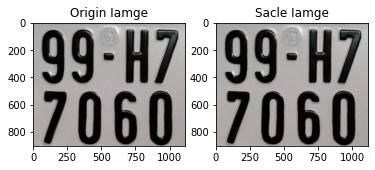

In [4]:
#   Scale bằng cách gấp đấy weight và height
h, w= img.shape[:2]
print('weight: {}'.format(w), 'height: {}'.format(h))
imgScale = cv2.resize(img, ( int(w*2), int(h*2) ), interpolation = cv2.INTER_LINEAR)
print('Scale image shape: {}'.format(imgScale.shape))
# cv2.imshow('imagescale', imgScale)
# cv2.waitKey(0)
plt.subplot(121), plt.imshow(imgScale), plt.title('Origin Iamge')
plt.subplot(122), plt.imshow(imgScale), plt.title('Sacle Iamge')
print('Origin Image shape: {}'.format(img.shape))
print('Scale Image shape: {}'.format(imgScale.shape))

(<AxesSubplot:title={'center':'Góc trên bên trái'}>,
 Text(0.5, 1.0, 'Góc trên bên trái'))

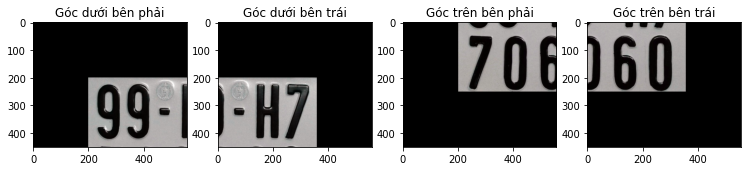

In [5]:
'''
    TRANSLATION IMAGE
'''
rows, cols = img.shape[:2]
#   Dịch chuyển hình ảnh xuống góc dưới bên phải
tx, ty = (200, 200)
M1 = np.array([[1, 0, tx],
              [0, 1, ty]], dtype=np.float32)
tran1 = cv2.warpAffine(img, M1, (cols, rows))

#   Dịch chuyển xuống góc dưới bên trái
M2 = np.array([[1, 0, -tx],
               [0, 1, ty]], dtype=np.float32)
tran2 = cv2.warpAffine(img, M2, (cols, rows))

#   Dịch chuyên lên góc trên bên phải
M3 = np.array([[1, 0, tx],
               [0, 1, -ty]], dtype= np.float32)
tran3 = cv2.warpAffine(img, M3, (cols, rows))

#   Dịch chuyển góc trên bên trái
M4 = np.array([[1, 0, -tx],
                [0, 1, -ty]], dtype= np.float32)
tran4 = cv2.warpAffine(img, M4, (cols, rows))


plt.figure(figsize=(16,4))
plt.subplot(151), plt.imshow(tran1), plt.title('Góc dưới bên phải')
plt.subplot(152), plt.imshow(tran2), plt.title('Góc dưới bên trái')
plt.subplot(153), plt.imshow(tran3), plt.title('Góc trên bên phải')
plt.subplot(154), plt.imshow(tran4), plt.title('Góc trên bên trái')



In [15]:
'''
    SMOOTHING IMAGE
'''


'\n    SMOOTHING IMAGE\n'

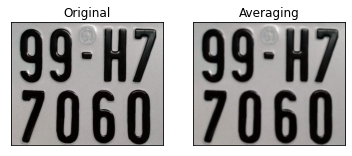

In [6]:
# Convolution 2D
kernel = np.ones((5,5), np.float32) / 25
imgSmooth = cv2.filter2D(img, -1, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgSmooth), plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

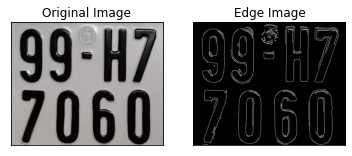

In [7]:
'''
    PHƯƠNG PHÁP Canny PHÁT HIỆN Edge
'''
edges = cv2.Canny(img, 100, 200)
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


(([], []), ([], []))

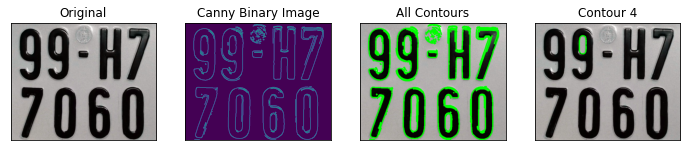

In [8]:
'''
    CONTOUR
'''
img5 = cv2.imread('Bienso.jpg')
cv2.imshow('Bien so', img5)
cv2.waitKey(0)

#   Lọc ảnh bằng thuật toán Canny
img5Canny = cv2.Canny(img5, 100, 200)

contours, hierarchy = cv2.findContours(img5Canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

imgOrigin = img5.copy()
img1 = img5.copy()
img2 = img5.copy()

# Vẽ toàn bộ contours trên hình ảnh gốc
cv2.drawContours(img1, contours, -1, (0, 255, 0), 3)

# Vẽ chỉ contour thứ 4 trên hình ảnh gốc
cv2.drawContours(img2, contours, 100, (0, 255, 0), 3)

plt.figure(figsize = (12, 3))
plt.subplot(141),plt.imshow(imgOrigin),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(img5Canny),plt.title('Canny Binary Image')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(img1),plt.title('All Contours')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(img2),plt.title('Contour 4')
plt.xticks([]), plt.yticks([])


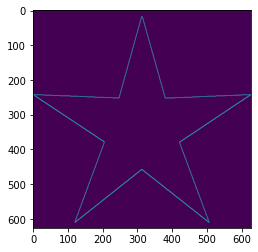

In [9]:
#   Vẽ contour 0 trên hình ảnh gốc
img6 = cv2.imread('star.jpg')
Img6Canny = cv2.Canny(img6, 100, 255)
contours, hierarchy = cv2.findContours(Img6Canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img6, contours, 0, (0, 255, 0), 3)
plt.imshow(Img6Canny)

In [10]:
cnt = contours[0]
M = cv2.moments(cnt)
print('Moment values of contour 0: {}'.format(M))

Moment values of contour 0: {'m00': 593.0, 'm10': 185011.3333333333, 'm01': 254727.66666666666, 'm20': 74621950.16666666, 'm11': 79511144.5, 'm02': 117635394.83333333, 'm30': 33826891611.600002, 'm21': 30857136231.2, 'm12': 36724230172.86667, 'm03': 57511249869.100006, 'mu20': 16899870.129941918, 'mu11': 38117.102210998535, 'mu02': 8215185.448098198, 'mu30': 177432.72984313965, 'mu21': -1221075303.162547, 'mu12': -9834256.004683018, 'mu03': -77720930.5004425, 'nu20': 48.05891707339397, 'nu11': 0.10839530955867507, 'nu02': 23.361890544543556, 'nu30': 0.020720345889332914, 'nu21': -142.59546511411733, 'nu12': -1.1484306540367413, 'nu03': -9.076141500126045}


Centroid position: (311, 429)


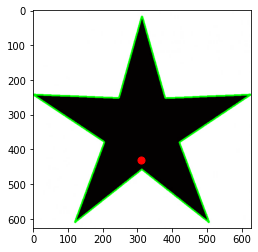

In [11]:
#Tính toán tâm của contour 0
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
print('Centroid position: ({}, {})'.format(cx, cy))

#   Vẽ biểu đồ tâm contour[0] và vẽ contour[0]
plt.imshow(img6)
plt.scatter(cx, cy, s = 50, c='red', marker = 'o')

centoid: (66, 125), (width, height): (1, 1)


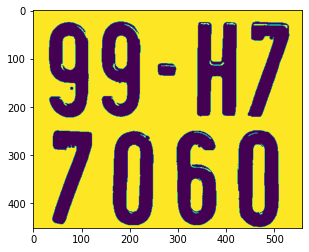

In [14]:
'''
    Bounding bOx
'''
#   Vẽ Bounding box hình chữ nhật đứng
img5 = cv2.imread('Bienso.jpg')
#   Chuyển ảnh sang gray
img5gray = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)

#   Chuyển ảnh sang ảnh nhị phân
_, img5 = cv2.threshold(img5gray, 100, 255, cv2.THRESH_BINARY)
# plt.imshow(img5)
#   TÌm kiếm comtour trên binary picture
contours, hierarchy = cv2.findContours(img5, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#   Tìm ra toàn bộ diện tích các contours và sắp xếp thứ tự từ cao xuống thấp
area_cnt = [cv2.contourArea(cnt) for cnt in contours]
area_sort = np.argsort(area_cnt)[::1]

#   Top 5 contours có diện tích lớn nhất
area_sort[:5]
#   Vẽ bounding box cho contours có diện tích lơn thứ 2
cnt = contours[area_sort[1]]
x,y,w,h = cv2.boundingRect(cnt)
print('centoid: ({}, {}), (width, height): ({}, {})'.format(x,y,w,h))
# rect = cv2.minAreaRect(cnt)
# box= cv2.boxPoints(rect)
# box = np.int0(box)
# img5 = cv2.drawContours(img5, [box], 0, (200, 100, 100), 2)
# plt.imshow(img5)
area_sort
def _drawBoundingBox(img5, cnt):
  x,y,w,h = cv2.boundingRect(cnt)
  img5 = cv2.rectangle(img5, (x,y),(x+w,y+h),(0,255,0),2)
  return img5
img5Origin = img5.copy()
# Vẽ bounding box cho 25 contours có diện tích lớn nhất
for i in area_sort[:25]:
  cnt = contours[i]
  img5Origin = _drawBoundingBox(img5Origin, cnt)
  plt.imshow(img5Origin)

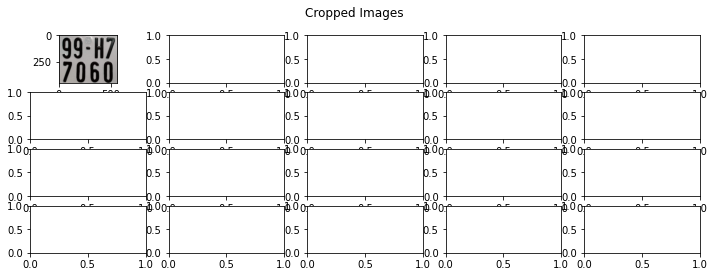

In [40]:
from non_max_suppression import *
boundingBoxes = [cv2.boundingRect(cnt) for cnt in contours]
boundingBoxes = np.array([(x,y,x+w,y+h) for (x,y,w,h) in boundingBoxes])
pick = non_max_suppression(boundingBoxes, 0.5)
def _cropImage(x1, y1, x2, y2, img):
  if np.ndim(img) == 3:
    crop = img[y1:y2, x1:x2, :]
  else:
    crop = img[y1:y2, x1:x2]
  return crop

crop_images = [_cropImage(x1, y1, x2, y2, img) for (x1, y1, x2, y2) in pick]

fg, ax = plt.subplots(4,5,figsize=(12, 4))
fg.suptitle('Cropped Images')

for i in np.arange(4):
  for j in np.arange(5):
    try:
      ax[i,j].imshow(crop_images[i+j+j*i])
      ax[i,j].set_xlabel('Sub Image '+str(i+j+j*i))
    except:
      next